In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
data_path = "data/abalone.csv"
label_path = "data/abalone_attributes.txt"

col = list()

with open( label_path,'r') as f:
    col = f.read().split('\n') 

abalone_data = pd.read_csv(data_path , names=col)
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [51]:
print(abalone_data.shape)

(4177, 9)


In [52]:
n_data = abalone_data.shape[0] #4177
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print('n:data:',n_data, '/ n_trn:',n_trn,'/ n_tst:', n_tst)

n:data: 4177 / n_trn: 2924 / n_tst: 1253


In [53]:
idx_data = pd.Series(range(0,4177))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

[3742  713 3000 ... 4088 3332 1307]


In [54]:
idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print('trn_size: ', idx_trn.size, '/ tst_size',idx_tst.size)

trn_size:  2924 / tst_size 1253


In [55]:
trnx = abalone_data.iloc[idx_trn, 1:8]
trny = abalone_data.iloc[idx_trn, 8]
tstx = abalone_data.iloc[idx_tst, 1:8]
tsty = abalone_data.iloc[idx_tst, 8]

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = trnx, y = trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[ 9.84950404 11.6776781   8.25255244 ... 11.08629937 10.19398476
  9.66881491]


In [57]:
np.sqrt(np.mean(np.square(lr_pred - tsty)))

2.2187290627542047

[131452.60064525]


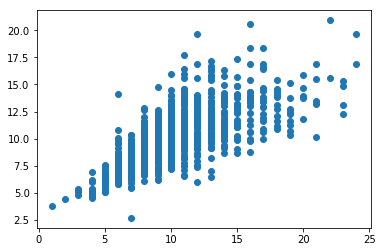

In [58]:
plt.scatter(x = tsty, y= lr_pred)
print(np.correlate(tsty, lr_pred))

In [59]:
from sklearn import metrics
print("RMSE: ", np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print("R2: ", metrics.r2_score(tsty, lr_pred))

RMSE:  2.218729062754205
R2:  0.5078156114123595
